# Распознавание аудио

Цель: получить аудио файл или поток аудио, затем перевести аудио в текст, получить из него макимум характеристик: громкость, ровность, четкость, и т.п.

In [122]:
import numpy as np
import matplotlib.pyplot as plt

import sounddevice as sd
import speech_recognition as sr

## Распознаем текст с помощью сервиса Google

In [123]:
recognizer = sr.Recognizer()
microphone = sr.Microphone()

Говорим...

In [125]:
with microphone:
    # регулирование уровня окружающего шума
    recognizer.adjust_for_ambient_noise(microphone, duration=2)

    try:
        print("Слушаю...")
        #recognizer.energy_threshold = 300
        #recognizer.pause_threshold = 3
        audio = recognizer.listen(microphone)

    except sr.WaitTimeoutError:
        print("Проверьте ваш микрофон.")
#         return 0

Слушаю...


Распознаем:

In [126]:

try:
    text = recognizer.recognize_google(audio, language="ru-RU")
except:
    text = 'Не удалось распознать. Попробуйте еще раз. После нажатия на кнопку подождите 3-4 секунды.'
print(text)

распознаём текст так я записываю свой голос


## Определим уровень громкости речи с помощью sounddevice

Записываем

In [127]:
fs = 44100 
duration = 15  # seconds
myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=2)
myrecording

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)

# Проигрываем (можно вставить кнопку, чтобы человек мог прослушать своюю речь):

In [128]:
sd.play(myrecording, fs)

In [129]:

myrecording = np.linalg.norm(myrecording)
print('Уровень громкости:', myrecording)
if myrecording<7:
    print('Слишком тихо, постарайтесь еще')
elif myrecording<12:
    print('Тихо: неплохо, но постарайтесь еще немного')
elif myrecording<20:
    print('Хорошо, вы молодец!')
elif myrecording>=20:
    print('Ух, как здорово!')

Уровень громкости: 16.526861
Хорошо, вы молодец!


## Запись речи в потоке

In [130]:
duration = 5 #in seconds
mass = []

def audio_callback(indata, frames, time, status):
    volume_norm = np.linalg.norm(indata) * 10
    mass.append(volume_norm)
    print("|" * int(volume_norm))

def d():

    stream = sd.InputStream(callback=audio_callback)
    with stream:
        sd.sleep(duration * 1000)
    return mass
mass1 = d()

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
|||||||||||||||||||||||
||||||||||||||
||||||||||||||
|||||||||||||
||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||
||||||||||||||||||||||
||||||
|




|
|


|
||||
|
|||||||||||
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||

График амплитуды звуковых колебаний. По нему можно определить ровность речи, низходящий и восходящий тип речи.

Text(0.5, 1.0, 'График записи речи')

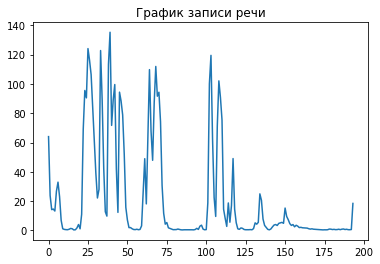

In [131]:
plt.plot(mass1)
plt.title('График записи речи')

Речь четкая, довольно быстрая.

## План на дальнейшую работу

https://www.youtube.com/watch?v=3FpEljYFAi4